In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore') 
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
import fxcmpy
TOKEN = 'ccf0e2248bf73ca5f37919cc53913fa67935cea4'
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error', server='real')
start = dt.datetime(2010, 1, 1)
stop = dt.datetime(2020, 11, 25)
tickerDf = con.get_candles('EUR/USD', period='D1',start=start, stop=stop,columns=['asks', 'tickqty'],with_index=False)

In [3]:
#see your data
tickerDf.head()

,date,askopen,askclose,askhigh,asklow,tickqty
0,2010-01-04 22:00:00,1.43332,1.44144,1.44563,1.42587,55015
1,2010-01-05 22:00:00,1.44144,1.43676,1.44845,1.43472,60382
2,2010-01-06 22:00:00,1.43676,1.44091,1.44357,1.42835,58258
3,2010-01-07 22:00:00,1.44091,1.43104,1.44476,1.43000,56049
4,2010-01-08 22:00:00,1.43104,1.44156,1.44399,1.42646,58253


In [4]:
# Rename the columns
tickerDf.rename(columns = {'askopen':'open',
                       'askclose':'close',
                       'askhigh':'high',
                       'asklow':'low',
                       'tickqty':'volume'}, inplace = True) 

Text(0, 0.5, 'Price')

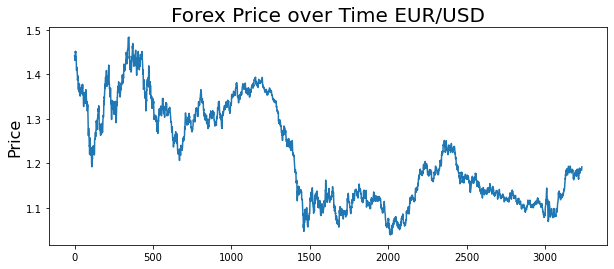

In [5]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.close)
plt.title('Forex Price over Time EUR/USD', fontsize=20)
plt.ylabel('Price', fontsize=16)

#Stationarity: take first difference of this series


In [6]:
#take first difference
first_diffs = tickerDf.close.values[1:] - tickerDf.close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [7]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [8]:
tickerDf.head()

,date,open,close,high,low,volume,FirstDifference
0,2010-01-04 22:00:00,1.43332,1.44144,1.44563,1.42587,55015,-0.00468
1,2010-01-05 22:00:00,1.44144,1.43676,1.44845,1.43472,60382,0.00415
2,2010-01-06 22:00:00,1.43676,1.44091,1.44357,1.42835,58258,-0.00987
3,2010-01-07 22:00:00,1.44091,1.43104,1.44476,1.43000,56049,0.01052
4,2010-01-08 22:00:00,1.43104,1.44156,1.44399,1.42646,58253,0.00996


In [9]:
tickerDf = tickerDf.set_index('date')[['close','FirstDifference']]

In [10]:
tickerDf.head()

,close,FirstDifference
date,,
2010-01-04 22:00:00,1.44144,-0.00468
2010-01-05 22:00:00,1.43676,0.00415
2010-01-06 22:00:00,1.44091,-0.00987
2010-01-07 22:00:00,1.43104,0.01052
2010-01-08 22:00:00,1.44156,0.00996


Text(0, 0.5, 'Price Difference')

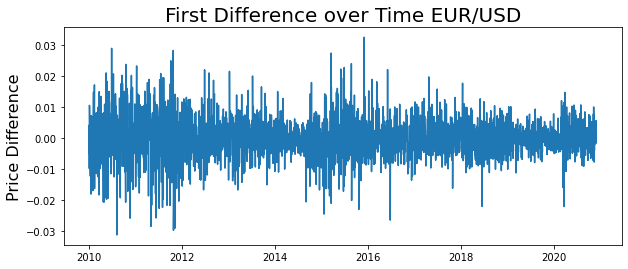

In [11]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time EUR/USD', fontsize=20)
plt.ylabel('Price Difference', fontsize=16)

#ACF

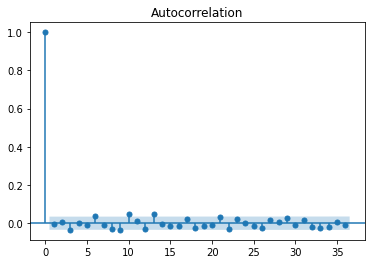

In [12]:
acf_plot = plot_acf(tickerDf.FirstDifference)

ACF isn't that informative

PACF

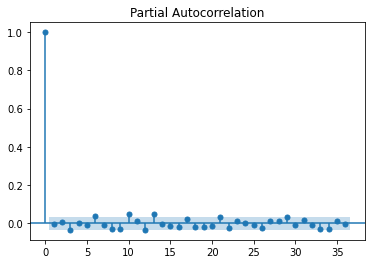

In [13]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

PACF also doesn't tell us much